In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
train = pd.read_csv('C:/Users/Lee Dong woo/Desktop/LGAimers/train.csv')
test = pd.read_csv('C:/Users/Lee Dong woo/Desktop/LGAimers/test.csv')
meta_x_features= pd.read_csv('C:/Users/Lee Dong woo/Desktop/LGAimers/meta/x_feature_info.csv')
meta_y_features= pd.read_csv('C:/Users/Lee Dong woo/Desktop/LGAimers/meta/y_feature_info.csv')

from sklearn.linear_model import LinearRegression
from sklearn.multioutput import MultiOutputRegressor
import random
import os
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED']=str(seed)
    np.random.seed(seed)
seed_everything(42)
train_x = train.filter(regex='X') # Input : X Feature
train_y = train.filter(regex='Y') # Input : y Feature


Y_10

In [2]:
df10_pass=train_y[(train_y['Y_10']>=-30.6)&(train_y['Y_10']<=-20)]
df10_fail=train_y[(train_y['Y_10']<-30.6)|(train_y['Y_10']>-20)]





Pass, Fail 구분. 이후 X_feature 들에 대해서 boxplot 비교

In [3]:
df10_pass.index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            39597, 39598, 39599, 39600, 39601, 39602, 39603, 39604, 39605,
            39606],
           dtype='int64', length=39602)

In [4]:
x10_train_pass = train_x.loc[df10_pass.index,:]
x10_train_fail = train_x.loc[df10_fail.index,:]
x10_train_pass

,X_01,X_02,X_03,X_04,X_05,X_06,X_07,X_08,X_09,X_10,...,X_47,X_48,X_49,X_50,X_51,X_52,X_53,X_54,X_55,X_56
0,70.544,103.320,67.47,1,101.892,74.983,29.45,62.38,245.71,0.0,...,1,1,9706.03,137.043591,135.359219,147.837968,134.313475,125.605427,136.721425,125.028256
1,69.524,103.321,65.17,1,101.944,72.943,28.73,61.23,233.61,0.0,...,1,1,10423.43,133.736691,135.979817,149.924692,123.630583,127.893337,143.322659,124.877308
2,72.583,103.320,64.07,1,103.153,72.943,28.81,105.77,272.20,0.0,...,1,1,10948.53,132.805112,131.055355,146.814592,128.939070,127.012195,140.395688,122.238232
3,71.563,103.320,67.57,1,101.971,77.022,28.92,115.21,255.36,0.0,...,1,1,15007.03,134.138760,133.239422,139.720132,132.260824,130.723186,147.624829,134.875225
4,69.524,103.320,63.57,1,101.981,70.904,29.68,103.38,241.46,0.0,...,1,1,11051.03,142.728970,136.620022,134.853555,134.760252,125.647793,139.331105,123.272762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39602,66.465,103.320,62.27,1,103.150,66.825,30.20,77.83,298.05,0.0,...,1,1,60630.73,129.965741,130.807148,133.481737,125.273130,121.780933,133.780110,129.029812
39603,66.465,103.321,62.77,1,102.021,66.825,29.21,102.25,270.67,0.0,...,1,1,60763.43,127.633885,120.158764,142.667802,122.465490,122.987209,143.090741,122.811413
39604,68.504,103.320,64.67,1,103.144,68.864,29.96,102.61,198.07,0.0,...,1,1,8813.33,132.501286,136.893025,134.419328,129.115431,130.920147,140.489232,119.166699
39605,66.465,103.320,63.67,1,102.025,67.845,30.30,112.60,275.52,0.0,...,1,1,62222.33,128.189679,121.495930,141.288011,130.141676,125.518825,136.603634,124.525929


In [5]:
x10_train_fail

,X_01,X_02,X_03,X_04,X_05,X_06,X_07,X_08,X_09,X_10,...,X_47,X_48,X_49,X_50,X_51,X_52,X_53,X_54,X_55,X_56
929,63.406,103.32,75.87,1,101.930,74.983,28.45,198.15,130.49,0.0,...,1,1,13727.93,129.012257,130.267086,142.226747,131.329756,125.328731,132.487896,120.104954
3962,69.524,103.32,72.97,1,101.903,72.943,33.64,108.66,278.54,0.0,...,1,1,12053.13,123.641606,128.136456,131.613580,123.074308,115.408214,127.594746,124.535381
6239,71.563,103.32,73.57,1,101.962,72.943,33.22,121.31,234.32,0.0,...,1,1,20402.03,128.479832,126.391079,131.334512,117.351545,118.518535,129.653553,117.228726
7920,69.524,103.32,71.87,1,101.908,69.884,28.88,205.37,134.22,0.0,...,1,1,13840.13,129.036984,132.139706,131.743997,122.164618,123.726703,141.501133,129.271710
12617,71.563,103.32,72.27,1,103.153,71.923,29.63,208.54,99.25,0.0,...,1,1,13886.53,133.221516,125.858784,131.919878,128.587339,129.263401,133.881733,124.598553


In [6]:
x10_train_pass['X_60']='Pass'
x10_train_fail['X_60']='Fail'
x10_train_fail

,X_01,X_02,X_03,X_04,X_05,X_06,X_07,X_08,X_09,X_10,...,X_48,X_49,X_50,X_51,X_52,X_53,X_54,X_55,X_56,X_60
929,63.406,103.32,75.87,1,101.930,74.983,28.45,198.15,130.49,0.0,...,1,13727.93,129.012257,130.267086,142.226747,131.329756,125.328731,132.487896,120.104954,Fail
3962,69.524,103.32,72.97,1,101.903,72.943,33.64,108.66,278.54,0.0,...,1,12053.13,123.641606,128.136456,131.613580,123.074308,115.408214,127.594746,124.535381,Fail
6239,71.563,103.32,73.57,1,101.962,72.943,33.22,121.31,234.32,0.0,...,1,20402.03,128.479832,126.391079,131.334512,117.351545,118.518535,129.653553,117.228726,Fail
7920,69.524,103.32,71.87,1,101.908,69.884,28.88,205.37,134.22,0.0,...,1,13840.13,129.036984,132.139706,131.743997,122.164618,123.726703,141.501133,129.271710,Fail
12617,71.563,103.32,72.27,1,103.153,71.923,29.63,208.54,99.25,0.0,...,1,13886.53,133.221516,125.858784,131.919878,128.587339,129.263401,133.881733,124.598553,Fail


In [7]:
x10_train = pd.concat([x10_train_pass,x10_train_fail],ignore_index=True)
x10_train

,X_01,X_02,X_03,X_04,X_05,X_06,X_07,X_08,X_09,X_10,...,X_48,X_49,X_50,X_51,X_52,X_53,X_54,X_55,X_56,X_60
0,70.544,103.320,67.47,1,101.892,74.983,29.45,62.38,245.71,0.0,...,1,9706.03,137.043591,135.359219,147.837968,134.313475,125.605427,136.721425,125.028256,Pass
1,69.524,103.321,65.17,1,101.944,72.943,28.73,61.23,233.61,0.0,...,1,10423.43,133.736691,135.979817,149.924692,123.630583,127.893337,143.322659,124.877308,Pass
2,72.583,103.320,64.07,1,103.153,72.943,28.81,105.77,272.20,0.0,...,1,10948.53,132.805112,131.055355,146.814592,128.939070,127.012195,140.395688,122.238232,Pass
3,71.563,103.320,67.57,1,101.971,77.022,28.92,115.21,255.36,0.0,...,1,15007.03,134.138760,133.239422,139.720132,132.260824,130.723186,147.624829,134.875225,Pass
4,69.524,103.320,63.57,1,101.981,70.904,29.68,103.38,241.46,0.0,...,1,11051.03,142.728970,136.620022,134.853555,134.760252,125.647793,139.331105,123.272762,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39602,63.406,103.320,75.87,1,101.930,74.983,28.45,198.15,130.49,0.0,...,1,13727.93,129.012257,130.267086,142.226747,131.329756,125.328731,132.487896,120.104954,Fail
39603,69.524,103.320,72.97,1,101.903,72.943,33.64,108.66,278.54,0.0,...,1,12053.13,123.641606,128.136456,131.613580,123.074308,115.408214,127.594746,124.535381,Fail
39604,71.563,103.320,73.57,1,101.962,72.943,33.22,121.31,234.32,0.0,...,1,20402.03,128.479832,126.391079,131.334512,117.351545,118.518535,129.653553,117.228726,Fail
39605,69.524,103.320,71.87,1,101.908,69.884,28.88,205.37,134.22,0.0,...,1,13840.13,129.036984,132.139706,131.743997,122.164618,123.726703,141.501133,129.271710,Fail


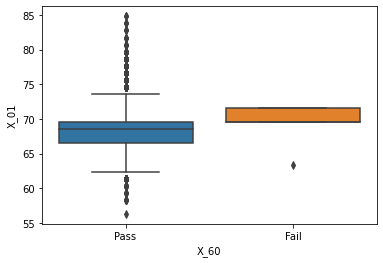

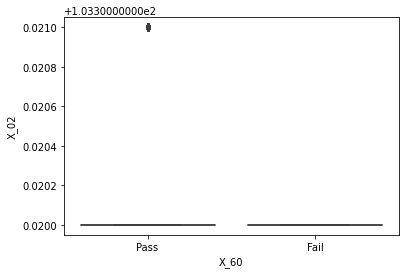

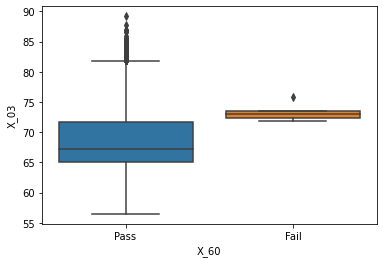

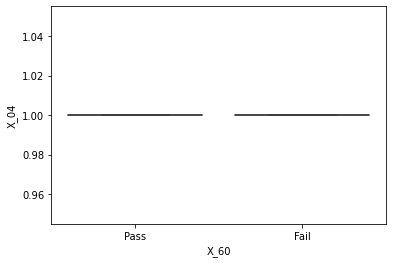

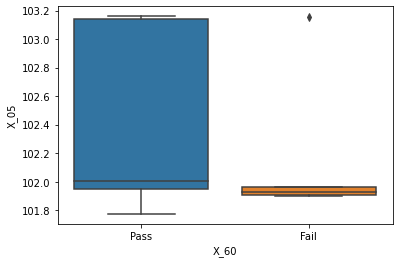

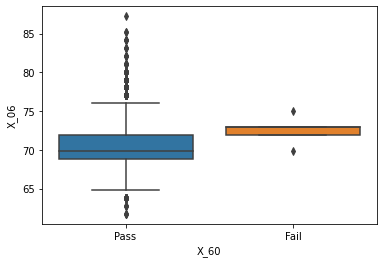

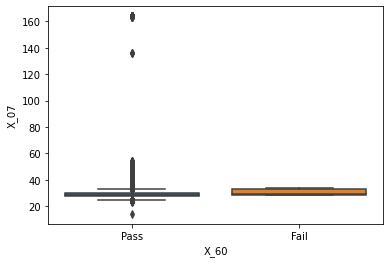

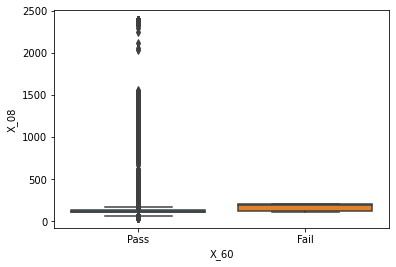

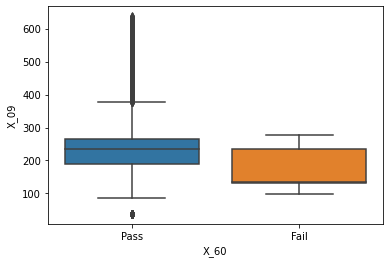

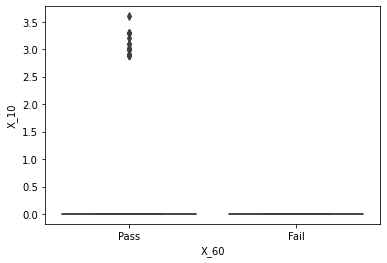

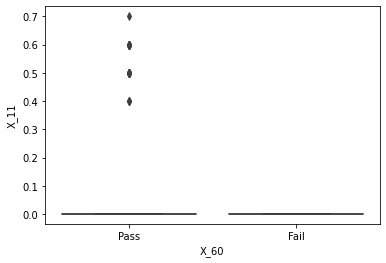

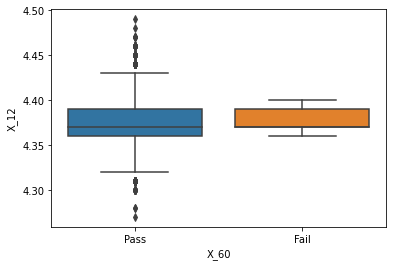

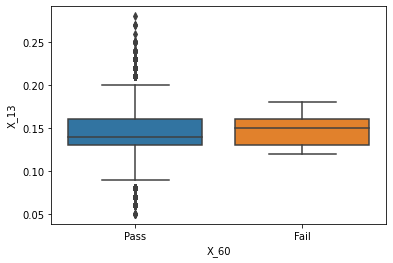

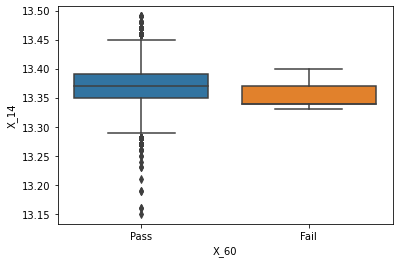

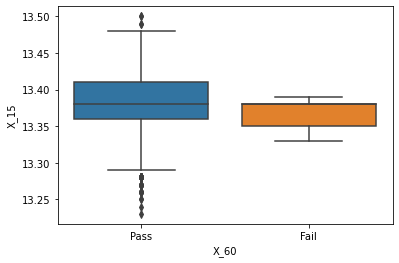

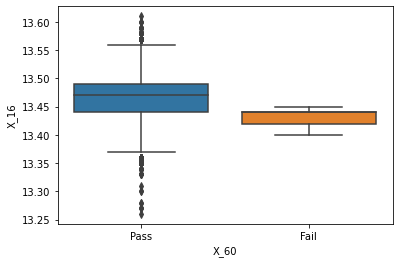

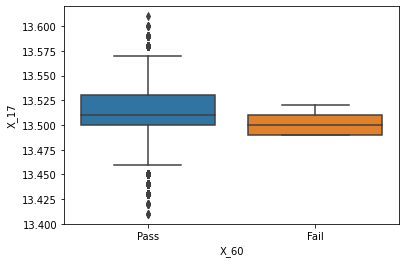

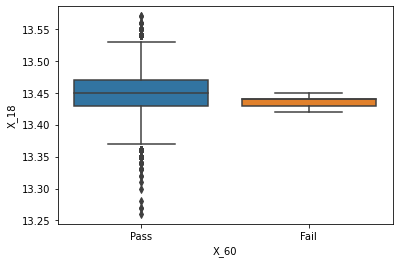

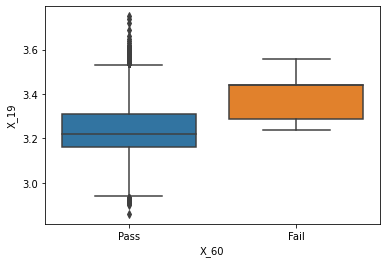

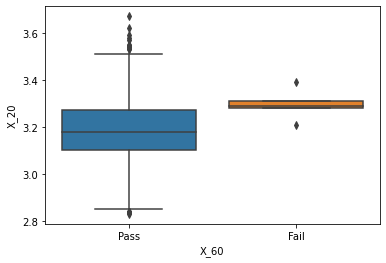

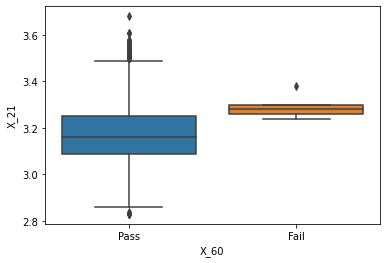

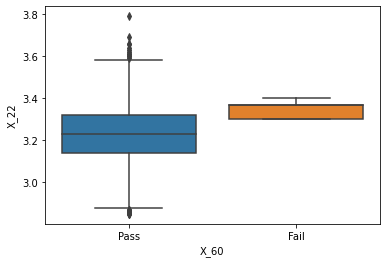

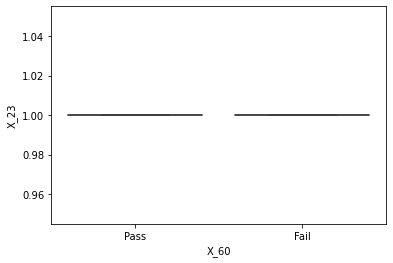

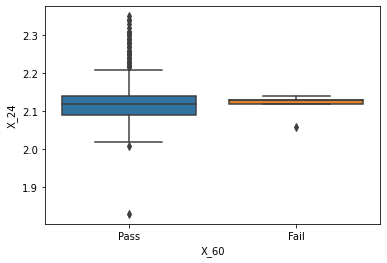

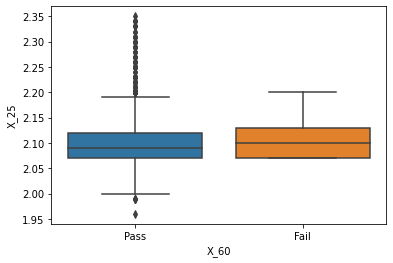

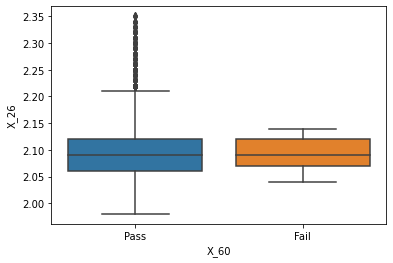

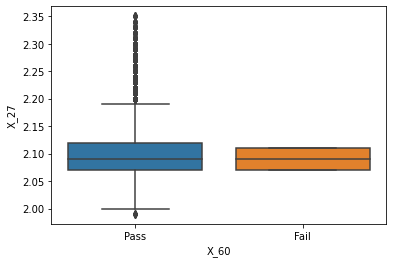

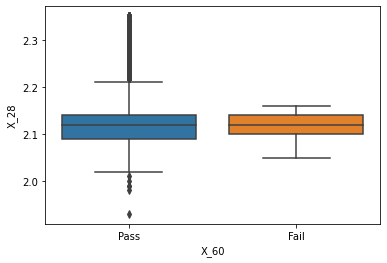

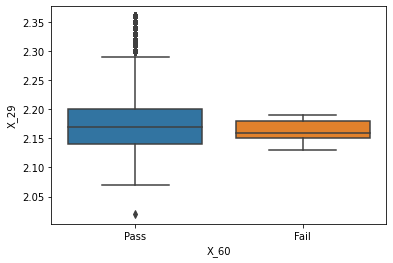

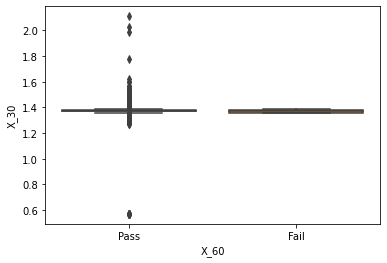

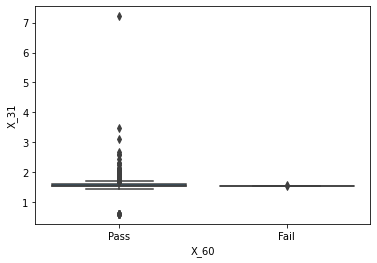

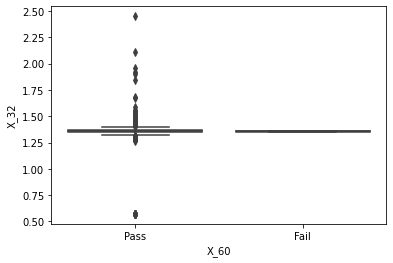

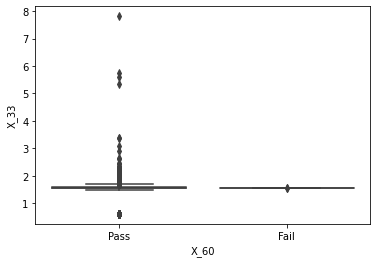

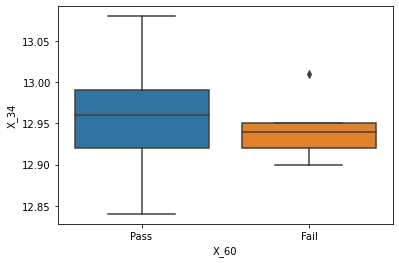

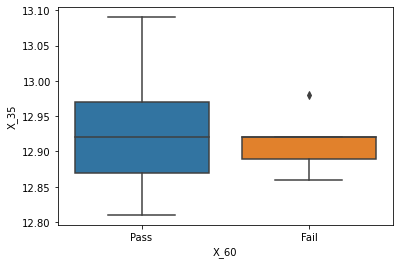

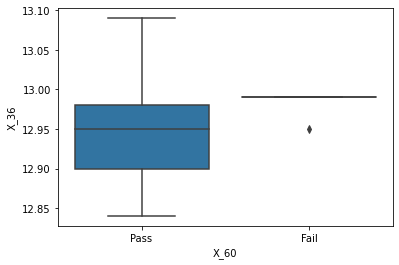

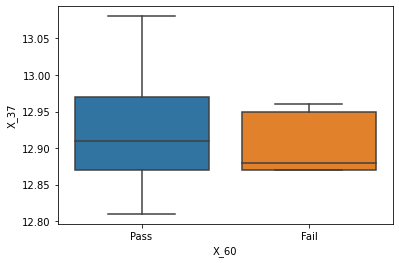

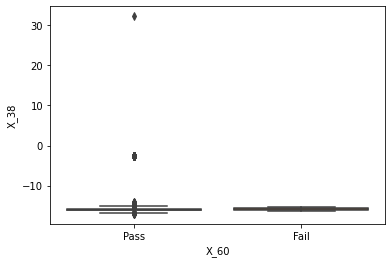

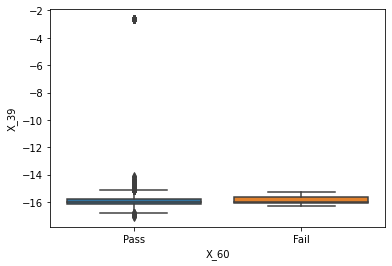

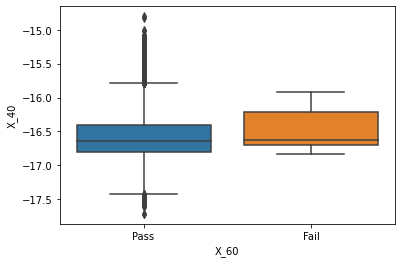

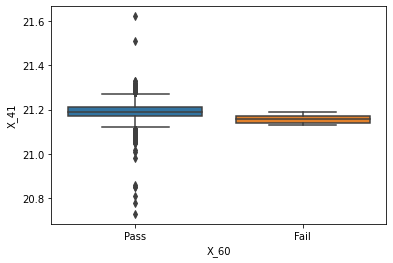

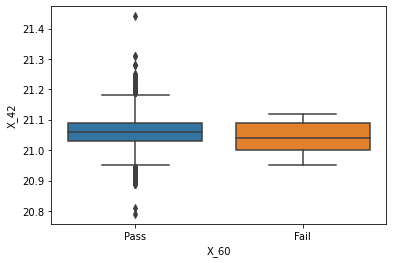

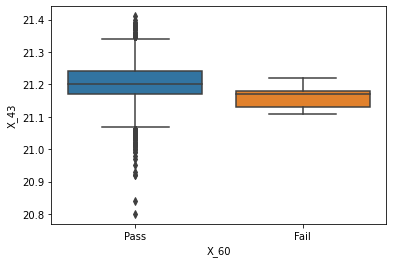

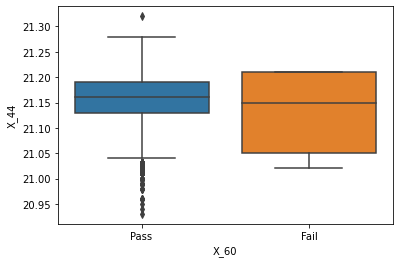

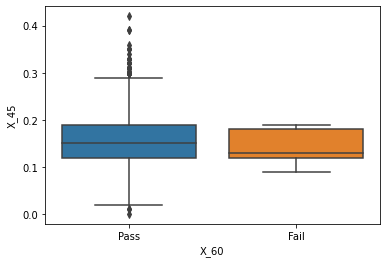

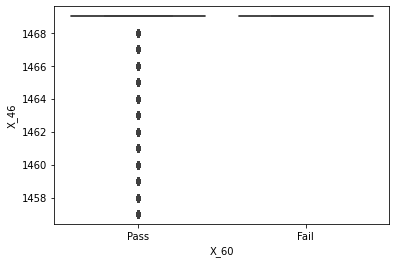

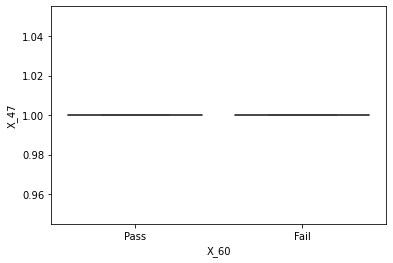

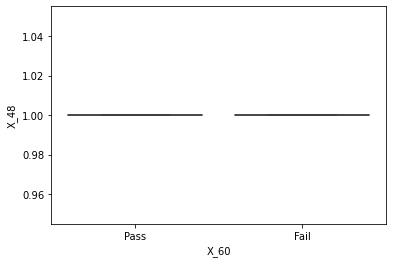

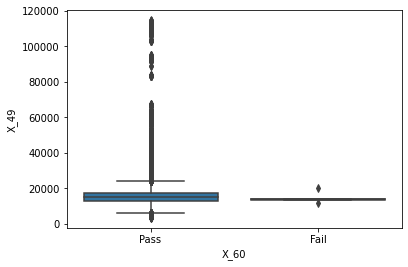

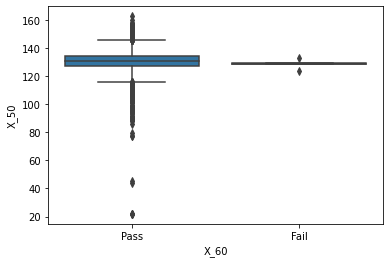

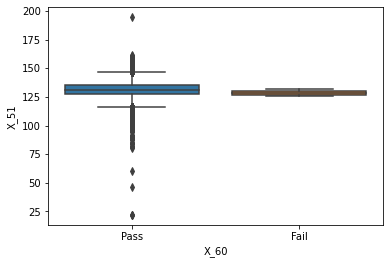

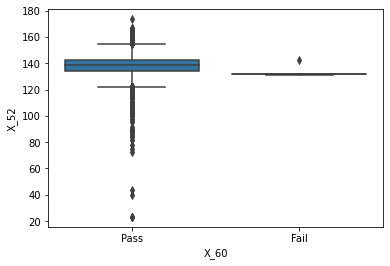

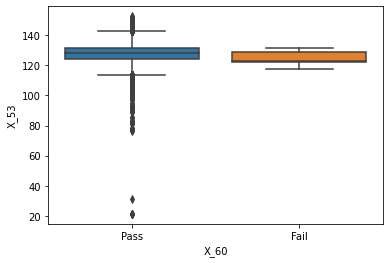

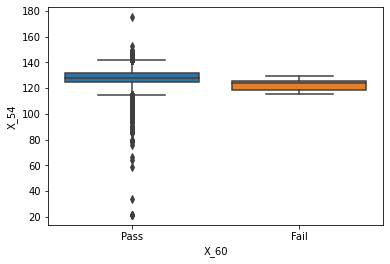

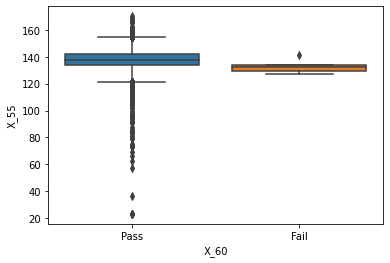

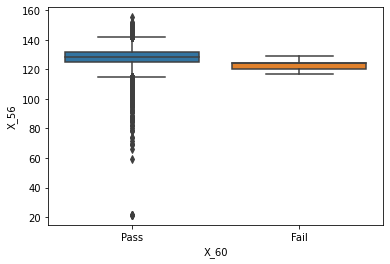

In [9]:
import seaborn as sns
for i in range(1,57):
    if i<10:
        sns.boxplot(x='X_60',y='X_{}'.format('0'+str(i)),data=x10_train)
        plt.show()
    else:
        sns.boxplot(x='X_60',y='X_{}'.format(i),data=x10_train)
        plt.show()

Y_10

In [2]:
df10_pass=train_y[(train_y['Y_10']>=-30.6)&(train_y['Y_10']<=-20)]
df10_fail=train_y[(train_y['Y_10']<-30.6)|(train_y['Y_10']>-20)]



Y_11

In [3]:
df11_pass=train_y[(train_y['Y_11']>=19.6)&(train_y['Y_11']<=26.6)]
df11_fail=train_y[(train_y['Y_11']<19.6)|(train_y['Y_11']>26.6)]



Y_12


In [5]:
df12_pass=train_y[(train_y['Y_12']>=-29.2)&(train_y['Y_12']<=-24)]
df12_fail=train_y[(train_y['Y_12']<-29.2)|(train_y['Y_12']>-24)]



Y_13

In [6]:
df13_pass=train_y[(train_y['Y_13']>=-29.2)&(train_y['Y_13']<=-24)]
df13_fail=train_y[(train_y['Y_13']<-29.2)|(train_y['Y_13']>-24)]



Y_14

In [ ]:
df14_pass=train_y[(train_y['Y_14']>=-29.2)&(train_y['Y_14']<=-24)]
df14_fail=train_y[(train_y['Y_14']<-29.2)|(train_y['Y_14']>-24)]


